### Problem Statement
The term hate speech is understood as any type of verbal, written or behavioural communication that attacks or uses derogatory or discriminatory language against a person or group based on what they are, in other words, based on their religion, ethnicity, nationality, race, colour, ancestry, sex or another identity factor. In this problem, We will take you through a hate speech detection model with Machine Learning and Python.

Hate Speech Detection is generally a task of sentiment classification. So for training, a model that can classify hate speech from a certain piece of text can be achieved by training it on a data that is generally used to classify sentiments. So for the task of hate speech detection model, We will use the Twitter tweets to identify tweets containing Hate speech

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [4]:
df = pd.read_csv('Twitter Hate Speech.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Data Information

### How many numbers of observations and features

In [5]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 3


In [6]:
df.columns #column name

Index(['id', 'label', 'tweet'], dtype='object')

In [7]:
df.dtypes #data types

id        int64
label     int64
tweet    object
dtype: object

In [8]:
df.info() # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [9]:
df.size #size of data

95886

## Predictor and Target Attribute


In [10]:
# Predictor Attribute
text = df.iloc[:, 1:]
text.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


In [11]:
# target Attribute
label = df.iloc[:, 0:1]
label.tail()

,id
31957,31958
31958,31959
31959,31960
31960,31961
31961,31962


In [12]:
df.isnull().sum() # check missing value

id       0
label    0
tweet    0
dtype: int64

####  Extracting the Target Attribute for Each Class and Visualize

In [13]:
# Extract the Label Feature for Each Class
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


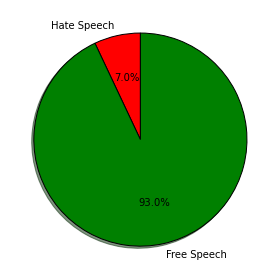

In [14]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green'])

plt.tight_layout()
plt.show()

## Data Preprocessing
In this part, we did data preprocessing. firstly, we did text cleaning with the help of Regular Expression and then we apply preprocessing operations like Tokenization to make a token of each sentence, then remove stop words like "the", "a", "at" etc and then apply stemming to reducing a word to its word stem. After that, we apply the IF-IDF model for feature extraction and we took 2000 most frequent words from dictionaries. In the end, we split our data for training and testing. And ratio for training and testing is 0.8 and 0.2 respectively.

### Text Cleaning
* Lowercase
* Remove Punctuation
* Remove Urls
* Removing @tags
* Remove Special Characters

### import library

In [15]:
import re
import nltk
import string
from nltk.text import Text

###  Lower Case

In [16]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)



In [17]:
df['tweet'].head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

### Remove Punctuation

In [18]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

In [19]:
df['tweet']

0         user when a father is dysfunctional and is so...
1        user user thanks for lyft credit i cant use ca...
2                                      bihday your majesty
3        model   i love u take with u all the time in u...
4                     factsguide society now    motivation
                               ...                        
31957    ate user isz that youuuðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    user sikh temple vandalised in in calgary wso ...
31961                      thank you user for you follow  
Name: tweet, Length: 31962, dtype: object

### Remove URL

In [20]:

def remove_url(text):
    retext=re.sub(r'http\S+', '',text)
    return retext

df['tweet'] = df['tweet'].apply(remove_url)

### Remove Tags

In [21]:
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext

df['tweet'] = df['tweet'].apply(remove_tag)

### Remove special characters 

In [22]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['tweet'] = df['tweet'].apply(remove_special)

In [23]:
df['tweet']

0        user when a father is dysfunctional and is so ...
1        user user thanks for lyft credit i cant use ca...
2                                      bihday your majesty
3               model i love u take with u all the time in
4                        factsguide society now motivation
                               ...                        
31957                                    ate user isz that
31958    to see nina turner on the airwaves trying to w...
31959    listening to sad songs on a monday morning otw...
31960    user sikh temple vandalised in in calgary wso ...
31961                        thank you user for you follow
Name: tweet, Length: 31962, dtype: object

 ## Preprocessing Operations
* Tokenizing
* Removing Stop Words
* Lemmatization
* WordCloud

### Tokenizing

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ish35\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [27]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [28]:
def tokenize(text):
    text = word_tokenize(text)
    return text

df['tweet'] = df['tweet'].apply(tokenize)

### Removing StopWords

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ish35\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords

In [42]:
def remove_stop(text):
    text  = [i for i in text if not i in stopwords.words('english')]
    return text

df['tweet'] = df['tweet'].apply(remove_stop)

 ### Lemmatization

In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ish35\AppData\Roaming\nltk_data...


True

In [43]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ish35\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [44]:
from nltk.stem import WordNetLemmatizer

In [45]:
def Lemmatize(text):
    word_lem = WordNetLemmatizer()
    text = [word_lem.lemmatize(token) for token in text]
    return text

df['tweet'] = df['tweet'].apply(Lemmatize)

### WordCloud


In [61]:
!pip install wordcloud

In [62]:
import wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS

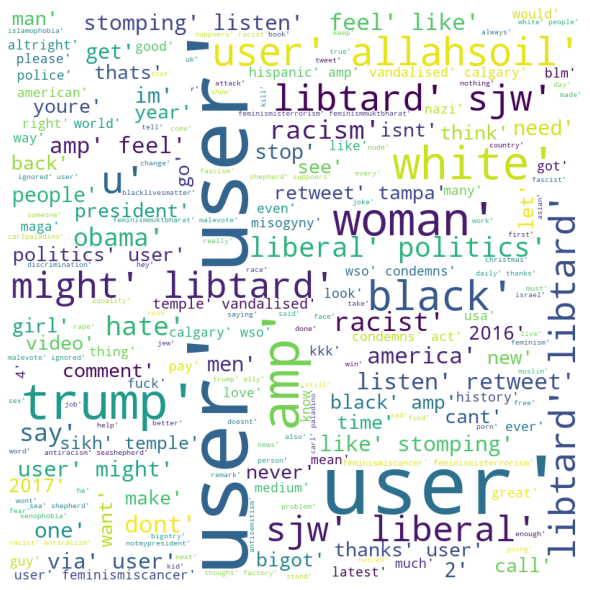

In [63]:
# WordCloud of Hate speech
hate_speech = df[df['label'] == 1]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in hate_speech.tweet:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

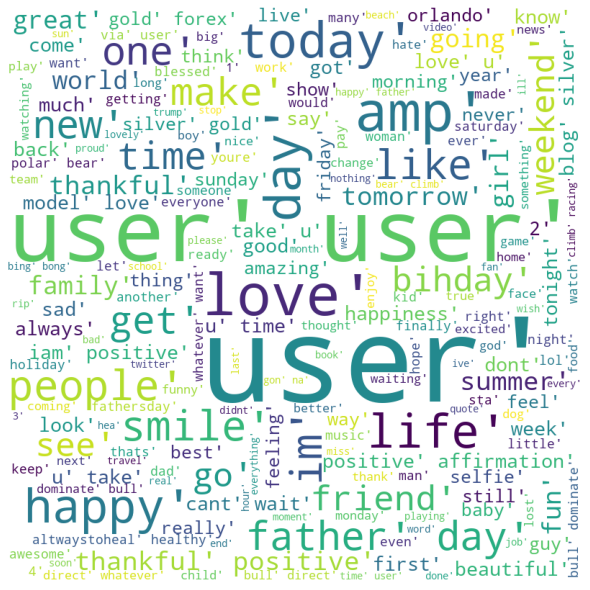

In [64]:
# WordCloud of free speech
free_speech = df[df['label'] == 0]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in free_speech.tweet:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()